In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Acquisition 

In [ ]:
def file_converter(path):
    head, sep, tail = path.partition('.')
    if tail.lower() in ['xls', 'xlsx', 'xlsm', 'xlsb', 'odf', 'ods' 'odt']:
        read_file = pd.read_excel(path)
    
    new_path = head + '.csv'
    read_file.to_csv(new_path, index = None, header=True)
    return new_path

In [14]:
# load, average and merge sensor samples
data_dir = '../data/raw/Bearing_Nasa'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

print("Dataset shape:", merged_data.shape)
merged_data.head()

/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will

Dataset shape: (982, 4)


/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(dataset_mean_abs)
/tmp/ipykernel_48151/1193243194.py:10: FutureWarning: The frame.append method is deprecated and will

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.15.09.52.39,0.059879,0.073674,0.076385,0.045048
2004.02.13.09.02.39,0.061485,0.075239,0.080926,0.043598
2004.02.15.05.02.39,0.060977,0.074060,0.078595,0.043699
2004.02.17.10.52.39,0.113907,0.077303,0.077197,0.050905
2004.02.18.04.12.39,0.104878,0.080979,0.081318,0.048865


In [18]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('../data/processed/Bearing_Nasa_data.csv')

## Plotting

In [16]:
bearing_data = pd.read_csv('../data/processed/Bearing_Nasa_data.csv')

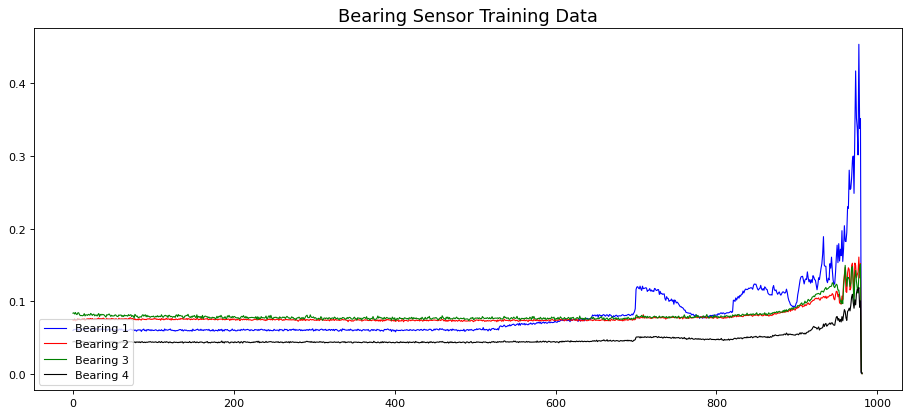

In [17]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(bearing_data['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(bearing_data['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(bearing_data['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(bearing_data['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()